# Market Basket Analysis Project

## Yashank Rajvanshi
### +91-7597607408
### 21it3030@rgipt.ac.in

In [1]:
# For importing, cleaning and transforming data
import numpy as np
import pandas as pd

# For data analysis
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# For visualisation
import matplotlib.pyplot as plt

In [2]:
# Import Groceries data.csv and basket.csv
groceries_df = pd.read_csv('Groceries data.csv')
basket_df = pd.read_csv('basket.csv')

In [3]:
groceries_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [4]:
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [5]:
basket_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


In [7]:
# Checking for NaN values
groceries_df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [8]:
# Checking for duplicates
groceries_df.duplicated(keep='first').sum()

759

In [9]:
# Removing duplicated rows (Dropped 759 entries)
groceries_df_cleaned = groceries_df.copy().drop_duplicates(keep='first')
groceries_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   Date             38006 non-null  object
 2   itemDescription  38006 non-null  object
 3   year             38006 non-null  int64 
 4   month            38006 non-null  int64 
 5   day              38006 non-null  int64 
 6   day_of_week      38006 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.3+ MB


In [10]:
# Check 'Member_number' column for values that are not of length = 4
groceries_df_cleaned['Member_number'][groceries_df_cleaned['Member_number'].astype(str).str.len() != 4].count()

0

In [11]:
# Check 'Date' column for values that are not of length = 10
groceries_df_cleaned['Date'][groceries_df_cleaned['Date'].str.len() != 10].count()

0

In [12]:
# Check 'itemDescription' column for misspelled or unusual values
groceries_df_cleaned['itemDescription'].value_counts()

itemDescription
whole milk               2363
other vegetables         1827
rolls/buns               1646
soda                     1453
yogurt                   1285
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [13]:
# Check 'year' column for unusual values
print(sorted(groceries_df_cleaned['year'].unique()))

[2014, 2015]


In [14]:
# Check 'month' column for unusual values
print(sorted(groceries_df_cleaned['month'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [15]:
# Check 'day' column for unusual values
print(sorted(groceries_df_cleaned['day'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [16]:
# Check 'day_of_week' column for unusual values
print(sorted(groceries_df_cleaned['day_of_week'].unique()))


[0, 1, 2, 3, 4, 5, 6]


## Explainatory Data Analysis (EDA)

In [17]:
# Lets find how many unique members there are in the dataset
print(f"There are {groceries_df_cleaned['Member_number'].nunique()} unique members.")

There are 3898 unique members.


In [18]:
# Lets find out the time period of the dataset
print(f"The dataset is from dates {groceries_df['Date'].min()} to {groceries_df['Date'].max()}")

The dataset is from dates 2014-01-01 to 2015-12-30


In [19]:
# Mapping the 'day_of_week' column values to their respective days in a week
groceries_df_cleaned['day_of_week'] = groceries_df_cleaned['day_of_week'].replace({0:'Monday', 1:'Tueday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
groceries_df_cleaned.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tueday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday


Text(0.5, 1.0, 'Top 10 most purchased item types')

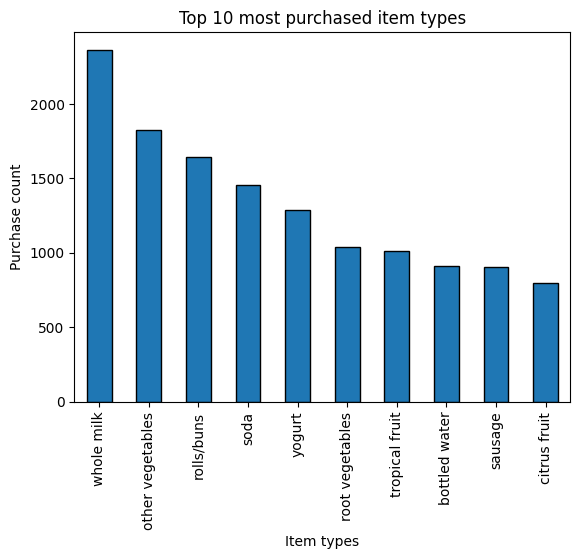

In [20]:
# Lets find the top 5 most purchased item type
groceries_df_cleaned['itemDescription'].value_counts().head(10).plot(kind='bar', edgecolor='black')

plt.xlabel('Item types')
plt.ylabel('Purchase count')
plt.title('Top 10 most purchased item types')

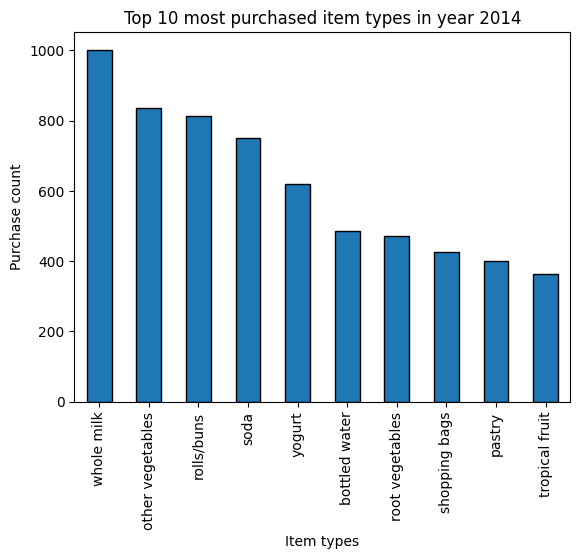

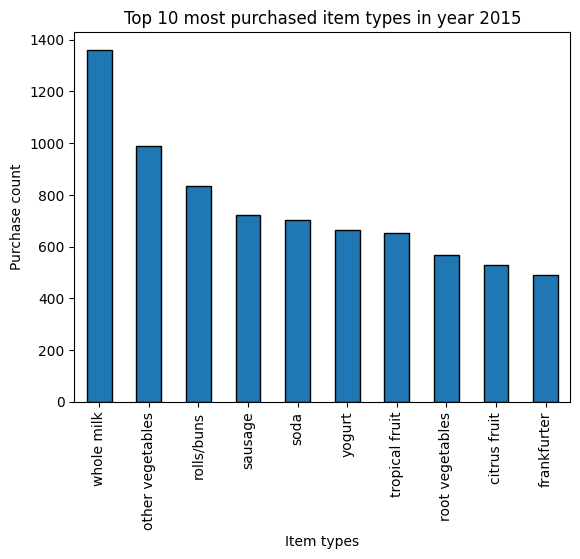

In [21]:
# Lets see if the top 10 most purchased item types for year 2014 and year 2015 separately
groceries_df_cleaned[groceries_df_cleaned['year'] == 2014]['itemDescription'].value_counts().head(10).plot(kind='bar', edgecolor='black')

plt.xlabel('Item types')
plt.ylabel('Purchase count')
plt.title('Top 10 most purchased item types in year 2014')
plt.show()

groceries_df_cleaned[groceries_df_cleaned['year'] == 2015]['itemDescription'].value_counts().head(10).plot(kind='bar', edgecolor='black')

plt.xlabel('Item types')
plt.ylabel('Purchase count')
plt.title('Top 10 most purchased item types in year 2015')
plt.show()

In [22]:
# Lets find out the top 5 member with the most transactions and the number of transactions
groceries_df_cleaned['Member_number'].value_counts().head(5)

Member_number
3180    35
3737    33
3050    32
2051    31
3915    30
Name: count, dtype: int64

<Axes: xlabel='day_of_week'>

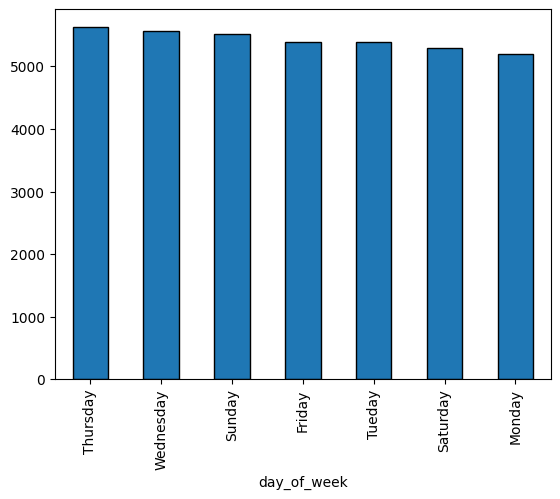

In [23]:
# Lets see if there is any difference in purchasing pattern on different days of the week
groceries_df_cleaned['day_of_week'].value_counts().plot(kind='bar',edgecolor='black')
# There is no significant purchasing pattern on different days of the week

year
2015    19981
2014    18025
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of transactions: 2014 VS 2015')

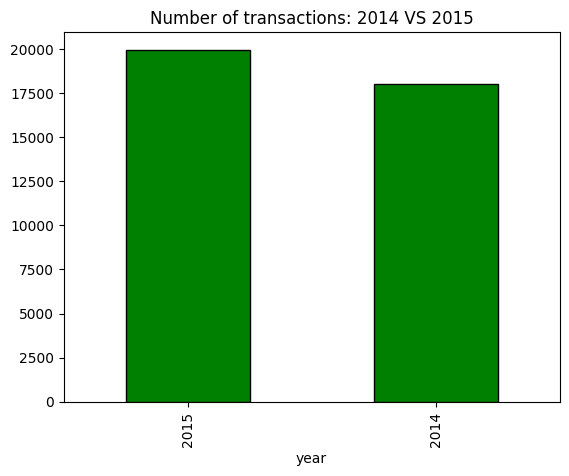

In [24]:
# Lastly, lets see if there is any different in the number of transactions 
# in year 2014 and 2015

print(groceries_df_cleaned['year'].value_counts())
groceries_df_cleaned['year'].value_counts().plot(kind='bar',edgecolor='black',color='green')
plt.title('Number of transactions: 2014 VS 2015')

# There is an increase of 1956 transaction from year 2014 to year 2015.

## Apriori Algorithm

In [25]:
basket_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Filling the NaN values with the word 'NA'
basket_df.fillna('NA', inplace=True)
basket_df

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NA,NA,NA,NA,NA,NA,NA,NA
1,sausage,whole milk,semi-finished bread,yogurt,NA,NA,NA,NA,NA,NA,NA
2,soda,pickled vegetables,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,canned beer,misc. beverages,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,sausage,hygiene articles,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,NA,NA,NA,NA,NA,NA,NA,NA,NA
14959,bottled water,herbs,NA,NA,NA,NA,NA,NA,NA,NA,NA
14960,fruit/vegetable juice,onions,NA,NA,NA,NA,NA,NA,NA,NA,NA
14961,bottled beer,other vegetables,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [27]:
# Formatting dataframe into list of lists
basket_df_list = basket_df.values.tolist()

# Removing 'NA' from each list
for i in range(len(basket_df_list)):
    basket_df_list[i] = [x for x in basket_df_list[i] if not x=='NA']

In [28]:
# Transactional encoding
te = TransactionEncoder()
te_ary = te.fit(basket_df_list).transform(basket_df_list)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori Algorithm

frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

frequent_itemsets.head(10)

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)
5,0.001136,(bathroom cleaner)
6,0.033950,(beef)
7,0.021787,(berries)
8,0.016574,(beverages)
9,0.045312,(bottled beer)


In [29]:
# confidence tells us the how likely the consequent will be bought when the antecedents is bought
rules.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
128,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
120,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
125,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642,0.122281
99,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985
123,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701,0.076751
129,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
30,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814,0.030162
46,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
9,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
37,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743,-0.006759


In [30]:
# lift tells us the strength of the rule 
rules.sort_values(by='lift', ascending=False).head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
127,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014
129,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681,0.481231
128,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877
33,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969,0.385385
89,(processed cheese),(root vegetables),0.010158,0.069572,0.001069,0.105263,1.513019,0.000363,1.039891,0.342549
104,(soft cheese),(yogurt),0.010025,0.085879,0.001270,0.126667,1.474952,0.000409,1.046704,0.325273
31,(detergent),(yogurt),0.008621,0.085879,0.001069,0.124031,1.444261,0.000329,1.043555,0.310280
18,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855,0.267112
120,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
88,(processed cheese),(rolls/buns),0.010158,0.110005,0.001470,0.144737,1.315734,0.000353,1.040610,0.242430
